In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
df=pd.read_csv("modified_dataset.csv")
df.head()

<ipython-input-1-ed38194224b8>:4: DtypeWarning: Columns (9,12,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("modified_dataset.csv")


Record ID  Incident Year  Incident Month  Incident Day Operator ID  \
0     127128           1990               1             1         DAL   
1     129779           1990               1             1         HAL   
2     129780           1990               1             2         UNK   
3       2258           1990               1             3         MIL   
4       2257           1990               1             3         MIL   

          Operator   Aircraft Aircraft Type Aircraft Make Aircraft Model  ...  \
0  DELTA AIR LINES  B-757-200             A           148             26  ...   
1     HAWAIIAN AIR       DC-9             A           583             90  ...   
2          UNKNOWN    UNKNOWN           NaN           NaN            NaN  ...   
3         MILITARY      A-10A             A           345            NaN  ...   
4         MILITARY       F-16             A           561            NaN  ...   

   Height  Speed Distance  Species ID         Species Name Species Quantity  \
0     NaN    NaN      NaN         NE1                 GULL                1   
1     0.0    NaN      0.0       ZZ201        HOUSE SPARROW                1   
2     NaN    NaN      0.0       R1101             BARN OWL                1   
3   200.0  138.0      NaN       UNKBM  UNKNOWN MEDIUM BIRD                1   
4   100.0  200.0      NaN          ZX                FINCH                1   

   Flight Impact Fatalities  Injuries Aircraft Damage  
0            NaN        NaN       NaN             1.0  
1            NaN        NaN       NaN             0.0  
2            NaN        NaN       NaN             0.0  
3            NaN        NaN       NaN             0.0  
4            NaN        NaN       NaN             0.0  

[5 rows x 37 columns]

In [ ]:
df.shape

(24470, 37)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24470 entries, 0 to 24469
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Record ID         24470 non-null  int64  
 1   Incident Year     24470 non-null  int64  
 2   Incident Month    24470 non-null  int64  
 3   Incident Day      24470 non-null  int64  
 4   Operator ID       24470 non-null  object 
 5   Operator          24470 non-null  object 
 6   Aircraft          24470 non-null  object 
 7   Aircraft Type     22059 non-null  object 
 8   Aircraft Make     21554 non-null  object 
 9   Aircraft Model    20025 non-null  object 
 10  Aircraft Mass     20416 non-null  float64
 11  Engine Make       19026 non-null  float64
 12  Engine Model      18690 non-null  object 
 13  Engines           20398 non-null  float64
 14  Engine Type       20385 non-null  object 
 15  Engine1 Position  20242 non-null  object 
 16  Engine2 Position  18532 non-null  float6

In [ ]:
from sklearn.preprocessing import LabelEncoder

object_columns = ['Operator ID', 'Operator', 'Aircraft', 'Aircraft Type', 'Aircraft Make', 'Aircraft Model',
                  'Engine Model', 'Engine Type', 'Engine1 Position', 'Engine3 Position', 'Airport ID',
                  'Airport', 'State', 'FAA Region', 'Warning Issued', 'Flight Phase', 'Visibility',
                  'Precipitation', 'Species ID', 'Species Name', 'Species Quantity', 'Flight Impact']

float_columns = ['Aircraft Mass', 'Engine Make', 'Engines', 'Engine2 Position', 'Engine4 Position',
                 'Height', 'Speed', 'Distance', 'Fatalities', 'Injuries']

le = LabelEncoder()
df[object_columns] = df[object_columns].apply(lambda col: le.fit_transform(col.astype(str)))


df[float_columns] = df[float_columns].applymap(lambda x: int(x) if not pd.isnull(x) else x)

In [ ]:
X = df.drop('Aircraft Damage',axis = 1)
y = df['Aircraft Damage']

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix



In [ ]:
import pandas as pd
df.fillna(0, inplace=True)

In [ ]:
df.head()

Record ID  Incident Year  Incident Month  Incident Day  Operator ID  \
0     127128           1990               1             1           91   
1     129779           1990               1             1          127   
2     129780           1990               1             2          272   
3       2258           1990               1             3          163   
4       2257           1990               1             3          163   

   Operator  Aircraft  Aircraft Type  Aircraft Make  Aircraft Model  ...  \
0       105        47              0              4              38  ...   
1       142       200              0             37              96  ...   
2       273       408              3             66             111  ...   
3       180         0              0             23             111  ...   
4       180       239              0             36             111  ...   

   Height  Speed  Distance  Species ID  Species Name  Species Quantity  \
0     0.0    0.0       0.0         166           131                 0   
1     0.0    0.0       0.0         308           148                 0   
2     0.0    0.0       0.0         198            23                 0   
3   200.0  138.0       0.0         214           269                 0   
4   100.0  200.0       0.0         287           105                 0   

   Flight Impact  Fatalities  Injuries  Aircraft Damage  
0              6         0.0       0.0              1.0  
1              6         0.0       0.0              0.0  
2              6         0.0       0.0              0.0  
3              6         0.0       0.0              0.0  
4              6         0.0       0.0              0.0  

[5 rows x 37 columns]

In [ ]:
y = y.fillna(0)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy based on your needs
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_imputed, y_train)


y_pred_knn = knn.predict(X_test_imputed)

print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))



[[4013   99]
 [ 708   74]]
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91      4112
         1.0       0.43      0.09      0.15       782

    accuracy                           0.84      4894
   macro avg       0.64      0.54      0.53      4894
weighted avg       0.78      0.84      0.79      4894

Accuracy: 0.835104209235799


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Assuming X and y are defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy based on your needs
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create a Decision Tree Classifier instance
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the Decision Tree model on the imputed training data
dt_classifier.fit(X_train_imputed, y_train)

# Predict on the imputed test data
y_pred_dt = dt_classifier.predict(X_test_imputed)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

print("\nAccuracy:", accuracy_score(y_test, y_pred_dt))


Confusion Matrix:
[[3605  507]
 [ 433  349]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.88      0.88      4112
         1.0       0.41      0.45      0.43       782

    accuracy                           0.81      4894
   macro avg       0.65      0.66      0.66      4894
weighted avg       0.82      0.81      0.81      4894


Accuracy: 0.8079280751941152


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create a Random Forest Classifier instance
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the Random Forest model on the imputed training data
rf_classifier.fit(X_train_imputed, y_train)

# Predict on the imputed test data
y_pred_rf = rf_classifier.predict(X_test_imputed)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nAccuracy:", accuracy_score(y_test, y_pred_rf))



Confusion Matrix:
[[4007  105]
 [ 532  250]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.93      4112
         1.0       0.70      0.32      0.44       782

    accuracy                           0.87      4894
   macro avg       0.79      0.65      0.68      4894
weighted avg       0.85      0.87      0.85      4894


Accuracy: 0.8698406211687781


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

logistic_classifier = LogisticRegression(random_state=42)

logistic_classifier.fit(X_train_imputed, y_train)

y_pred_logistic = logistic_classifier.predict(X_test_imputed)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logistic))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_logistic))

print("\nAccuracy:", accuracy_score(y_test, y_pred_logistic))


Confusion Matrix:
[[4069   43]
 [ 730   52]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.99      0.91      4112
         1.0       0.55      0.07      0.12       782

    accuracy                           0.84      4894
   macro avg       0.70      0.53      0.52      4894
weighted avg       0.80      0.84      0.79      4894


Accuracy: 0.8420514916223948


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

xgboost_classifier = XGBClassifier(random_state=42)

xgboost_classifier.fit(X_train_imputed, y_train)

y_pred_xgboost = xgboost_classifier.predict(X_test_imputed)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgboost))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgboost))

print("\nAccuracy:", accuracy_score(y_test, y_pred_xgboost))


Confusion Matrix:
[[3925  187]
 [ 448  334]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.93      4112
         1.0       0.64      0.43      0.51       782

    accuracy                           0.87      4894
   macro avg       0.77      0.69      0.72      4894
weighted avg       0.86      0.87      0.86      4894


Accuracy: 0.8702492848385779


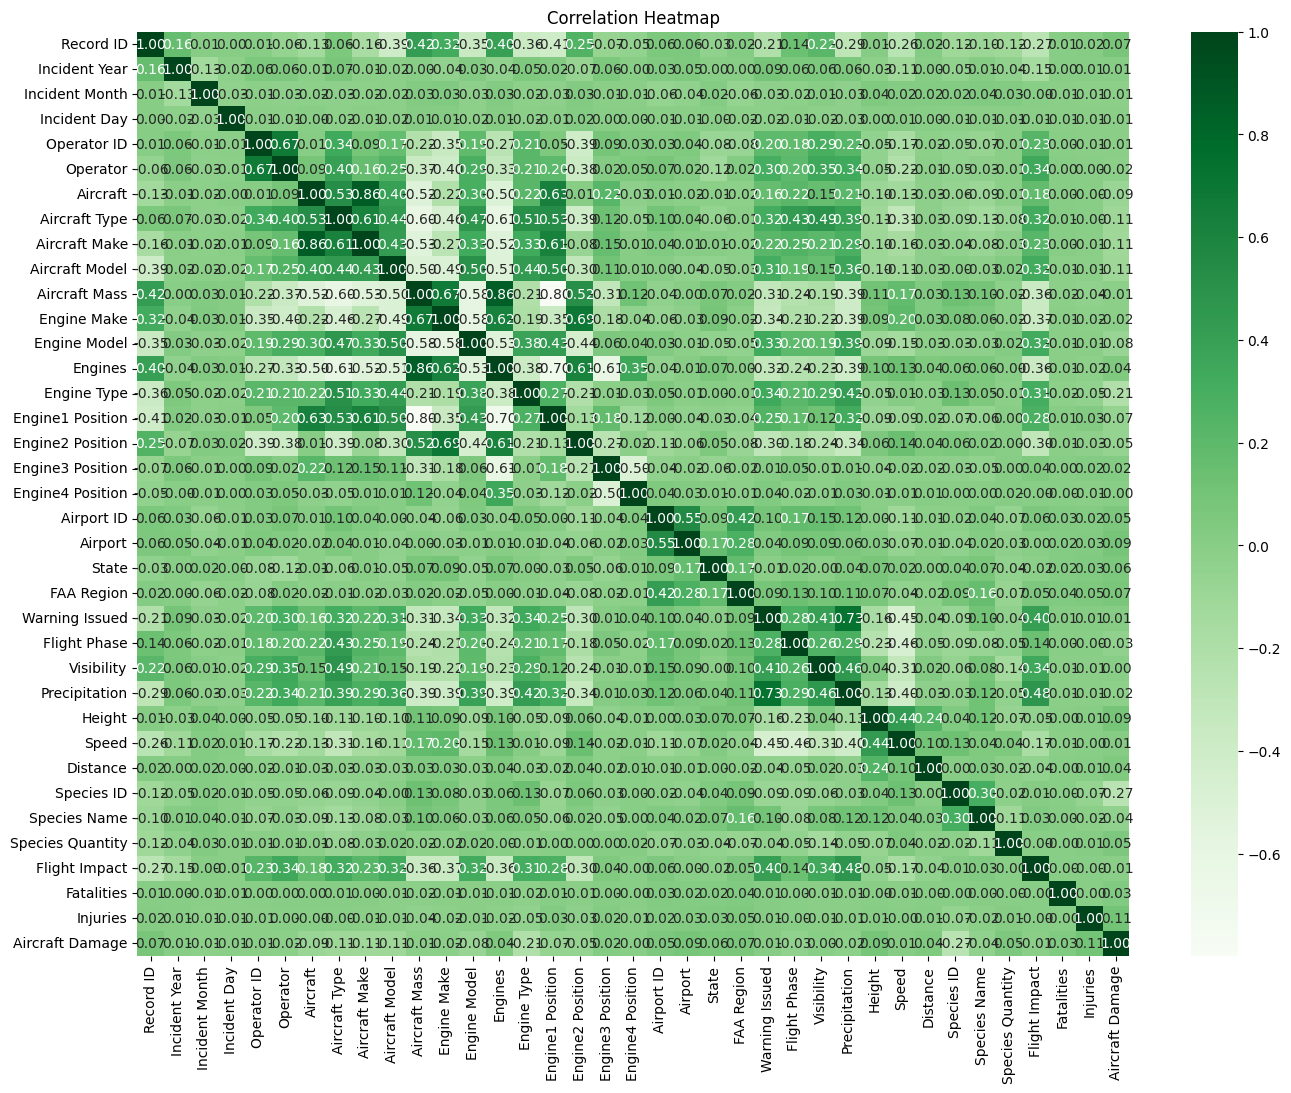

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, cmap='Greens', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

rf_classifier = RandomForestClassifier()

param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

random_search = RandomizedSearchCV(rf_classifier, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)

random_search.fit(X_train_imputed, y_train)

best_params = random_search.best_params_

y_pred_rf = random_search.predict(X_test_imputed)

print("Best Hyperparameters:", best_params)
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': False}
[[3980  132]
 [ 504  278]]
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      4112
         1.0       0.68      0.36      0.47       782

    accuracy                           0.87      4894
   macro avg       0.78      0.66      0.70      4894
weighted avg       0.85      0.87      0.85      4894

Accuracy: 0.870044953003678


In [ ]:
!pip install lime
import lime
import lime.lime_tabular

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=6a6ae4aa118db671ae3f9b7f8e899c355c8aa0c0a01062ff148af26e2bb92a3e
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
# Assuming X_train_imputed and y_train are defined
predict_fn = lambda x: random_search.predict_proba(x).astype(float)


In [ ]:
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(X_train_imputed, mode='classification', feature_names=list(X_train.columns))

# Choose a data point for explanation
exp_instance = X_test_imputed[0]

# Generate explanation
explanation = explainer.explain_instance(exp_instance, predict_fn, num_features=len(X_train.columns))

# Print explanation
explanation.show_in_notebook(show_table=True)


In [ ]:
import pandas as pd
df.fillna(0, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Initialize a label encoder
le = LabelEncoder()

# Fit the label encoder on all possible labels
all_labels = np.concatenate((y_pred_logistic, y_pred_knn, y_pred_dt, y_pred_rf, y_test))
le.fit(all_labels)

X = np.array([y_pred_logistic,y_pred_knn, y_pred_dt,y_pred_rf]).T
#print(X)
# Train a RandomForest model on the model outputs
meta_learner = RandomForestClassifier()
meta_learner.fit(X, y_test)
ensemble_predictions = meta_learner.predict(X)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,ensemble_predictions))
print(accuracy_score(y_test,ensemble_predictions))
print(classification_report(y_test,ensemble_predictions))

[[3981  131]
 [ 502  280]]
0.8706579485083776
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      4112
         1.0       0.68      0.36      0.47       782

    accuracy                           0.87      4894
   macro avg       0.78      0.66      0.70      4894
weighted avg       0.85      0.87      0.85      4894



       Aircraft Damage
23994              0.0
16782              1.0
11309              1.0
11686              0.0
9459               0.0
...                ...
22487              0.0
21036              1.0
9711               1.0
12777              0.0
14627              0.0

[4894 rows x 1 columns]


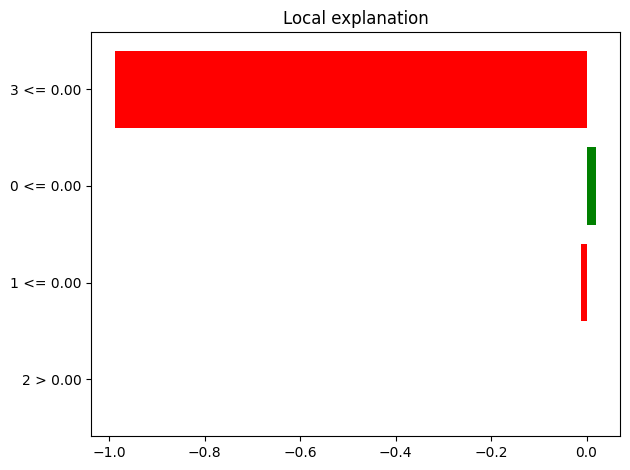

In [ ]:


from lime.lime_tabular import LimeTabularExplainer
X = pd.DataFrame(X)
y=pd.DataFrame(y_test)
print(y)
explainer = LimeTabularExplainer(X.values,feature_names=X.columns.values.tolist(),class_names=['TYPE'],mode='regression')
# Now explain a prediction
exp = explainer.explain_instance(X.values[1], meta_learner.predict,num_features=5)

exp.as_pyplot_figure()
from matplotlib import pyplot as plt
plt.tight_layout()

In [ ]:
exp.show_in_notebook(show_table=True)

In [ ]:
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Assume you have data X_train, X_test, y_train, y_test
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost classifier
clf = XGBClassifier()

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_pred_xgboost = clf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred_xgboost))
print(accuracy_score(y_test, y_pred_xgboost))
print(classification_report(y_test, y_pred_xgboost))


[[800  24]
 [ 95  60]]
0.8784473953013279
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93       824
         1.0       0.71      0.39      0.50       155

    accuracy                           0.88       979
   macro avg       0.80      0.68      0.72       979
weighted avg       0.87      0.88      0.86       979



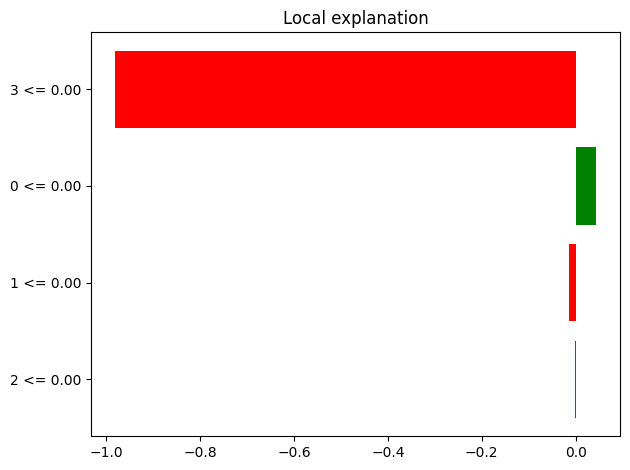

In [ ]:
from lime.lime_tabular import LimeTabularExplainer
#X = pd.DataFrame(X_train)
#y=pd.DataFrame(y_test)
#print(y)
explainer = LimeTabularExplainer(X_train.values,feature_names=X_train.columns.values.tolist(),class_names=['TYPE'],mode='regression')
# Now explain a prediction
exp = explainer.explain_instance(X_train.values[100], clf.predict,num_features=5)

exp.as_pyplot_figure()
from matplotlib import pyplot as plt
plt.tight_layout()

In [ ]:
exp.show_in_notebook(show_table=True)

In [ ]:
pip install shapash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.1/653.1 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.2/221.2 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 642.7/642.7 kB 34.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 58.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.4 MB/s eta 0:00:00
  Created wheel for dash-renderer: filename=dash_renderer-1.8.3-py3-none-any.whl size=1013920 sha256=e7bc3c8d5c954935aefd37fbb0d29bf42b24d8d848420dfcbedef040f2b86853
  Stored in directory: /root/.cache/pip/wheels/6c/04/c8/22a0b5a26c3ecb61e17a27d4bbe7fad32d1417bbdbd4d46acf
  Created wheel for dash-daq: filename=dash_daq-0.5.0-py3-none-any.whl size=669691 sha256=3325efc76d236fa3cc05a63bba32b9e6c81e958395991f0055440d82a8270822
  S

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Assume you have data X_train, X_test, y_train, y_test
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier
model2 = RandomForestClassifier(max_depth=5, random_state=42, n_estimators=12)

# Fit the RandomForest model
model2.fit(X_train, y_train)

# Make predictions
rf_y_pred = model2.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, rf_y_pred))
print(accuracy_score(y_test, rf_y_pred))
print(classification_report(y_test, rf_y_pred))


[[800  24]
 [ 95  60]]
0.8784473953013279
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93       824
         1.0       0.71      0.39      0.50       155

    accuracy                           0.88       979
   macro avg       0.80      0.68      0.72       979
weighted avg       0.87      0.88      0.86       979



A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [ ]:
from sklearn.ensemble import RandomForestClassifier
fi = (RandomForestClassifier(max_depth=5, random_state=42, n_estimators=12)
      .fit(X_train, y_train)
      .feature_importances_)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
